In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
dialogues = pd.read_csv("../data/dialouges_over_time.csv")
characters = pd.read_csv("../data/characters_w_map.csv")
end_sentiment = pd.read_csv("../data/end_sentiment.csv")



In [5]:
# Count the number of lines for each character
line_counts = dialogues['mapped'].value_counts()

# Get the top 20 characters with the most lines
top_20_characters = line_counts.head(100).reset_index()

# Rename columns for clarity
top_20_characters.columns = ['character', 'line_count']

In [6]:
# find end sentiment for top 20 characters
top20_final_sentiment = end_sentiment.loc[end_sentiment['speaker'].isin(top_20_characters['character'])]

# top 3
top3_final_sentiment = top20_final_sentiment.sort_values(by='final_accumulative_sentiment', ascending=False).head(1)

# bottom 3  
bottom3_final_sentiment = top20_final_sentiment.sort_values(by='final_accumulative_sentiment', ascending=True).head(1)



In [7]:
top3_final_sentiment

,speaker,final_accumulative_sentiment,final_average_sentiment
217,margaery,232.034402,0.192857


In [8]:
bottom3_final_sentiment

,speaker,final_accumulative_sentiment,final_average_sentiment
281,brienne,-122.387626,-0.15873


In [9]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hrobjarturh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords

# Example: English stopwords
stop_words = stopwords.words('english')
print(stop_words[:10])  # Display first 10 stopwords


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [22]:
def create_wordcloud(speaker, sentiment):
    speaker_dialogues = dialogues.loc[dialogues['mapped']==speaker]
    # create a word cloud for the speaker
    # join all texts into a single string since generate() expects a string
    text = ' '.join(speaker_dialogues['Text'].tolist())
    # remove words that are in stop_words or custom_stop_words
    text = ' '.join([word for word in text.split() 
                    if (word.lower() not in stop_words) or word.lower() == 'know' or word == 'know'])



    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    # Display the word cloud
    plt.figure(figsize=(10, 4))
    plt.title(f"{speaker}", fontsize=16) #- {len(speaker_dialogues)} Lines of dialogue - Final Accumulative Sentiment: {sentiment:.2f} ")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


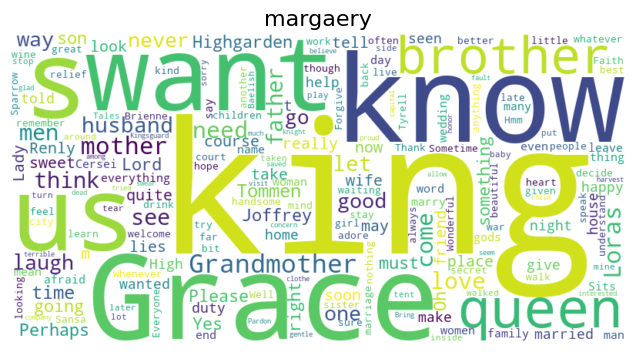

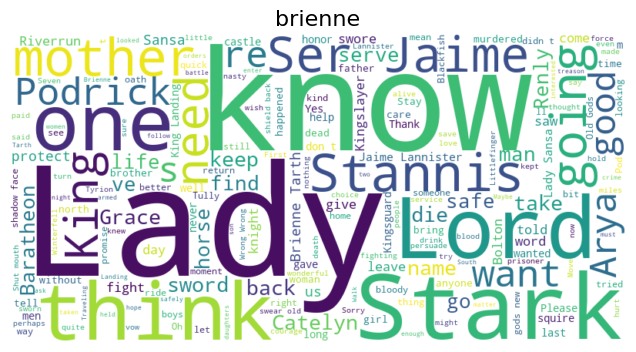

In [25]:
for speaker, sentiment in zip(top3_final_sentiment['speaker'], top3_final_sentiment['final_accumulative_sentiment']):
    create_wordcloud(speaker, sentiment)

for speaker, sentiment in zip(bottom3_final_sentiment['speaker'], bottom3_final_sentiment['final_accumulative_sentiment']):
    create_wordcloud(speaker, sentiment)


In [38]:
dialogues.loc[(dialogues['mapped']=='brienne') & (dialogues['Text'].str.contains('lady', case=False))]

,Text,Speaker,Episode,Season,Show,sentiment_score,sentiment_label,mapped,bracket,accumulative_sentiment,average_sentiment
3187,I don't serve the Starks. I serve Lady Catelyn.,BRIENNE,e10-Valar Morghulis,season-02,Game-of-Thrones,1.769409,NEGATIVE,brienne,NaN,-4.879092,-0.500000
3215,I don't serve the Starks. I serve Lady Cately...,BRIENNE,e10-Valar Morghulis,season-02,Game-of-Thrones,2.371989,POSITIVE,brienne,NaN,-21.598408,-0.473684
3844,"If you'll follow me, my lady.",BRIENNE,e3-What is Dead May Never Die,season-02,Game-of-Thrones,2.285415,POSITIVE,brienne,NaN,-8.500033,-0.166667
3846,I fought for my king. Soon I'll fight for him...,BRIENNE,e3-What is Dead May Never Die,season-02,Game-of-Thrones,1.371503,NEGATIVE,brienne,NaN,-9.871536,-0.200000
4646,"Will you stay there long, my lady?",BRIENNE,e5-The Ghost Of Harrenhal,season-02,Game-of-Thrones,0.334367,NEGATIVE,brienne,NaN,-19.666838,-0.354839
4653,Once you're safely back amongst your own peop...,BRIENNE,e5-The Ghost Of Harrenhal,season-02,Game-of-Thrones,1.953339,NEGATIVE,brienne,NaN,-22.812657,-0.352941
4661,"I do not know your son, my lady. But I could ...",BRIENNE,e5-The Ghost Of Harrenhal,season-02,Game-of-Thrones,2.735641,POSITIVE,brienne,NaN,-19.127544,-0.297297
4663,"Then I am yours, my lady. I will shield your ...",BRIENNE,e5-The Ghost Of Harrenhal,season-02,Game-of-Thrones,3.603945,POSITIVE,brienne,NaN,-15.523598,-0.263158
5483,Threatening my lady is an act of treason.,BRIENNE,e7-A Man Without Honor,season-02,Game-of-Thrones,3.213564,NEGATIVE,brienne,NaN,-17.046598,-0.268293
5516,"Your son returns at dawn, my lady?",BRIENNE,e7-A Man Without Honor,season-02,Game-of-Thrones,1.664451,POSITIVE,brienne,NaN,-15.382147,-0.238095
